In [5]:
import os
import cv2
import random
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from skimage import morphology
from skimage.io import imread


import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

image_path = "C:\\Users\\ugur_\\Python Projects\\DATA\\Lung Segmentation\\CXR_png\\"
mask_path = "C:\\Users\\ugur_\\Python Projects\\DATA\Lung Segmentation\\masks\\"

In [7]:
def SaveGeneratedMask(Image_collection_path, save_path, modelName):
    
    test_images = os.listdir(Image_collection_path)
    x = np.zeros((len(test_images), IMG_HEIGHT, IMG_WIDTH))
    
    for i, img_id in enumerate(test_images):
        img_collection = Image_collection_path  + img_id
        
        cv2_image = cv2.imread(img_collection,0)
        cv2_image = cv2.resize(cv2_image, (IMG_HEIGHT, IMG_WIDTH))
        cv2.imwrite('img.jpg', cv2_image)
        img = imread('img.jpg')
        x[i] = img
        os.remove('img.jpg')
    
    model2 = load_model(modelName)
    pred_img = model2.predict(x/255.)*255.0
    
    for j, img_id in enumerate(test_images):   
        new_img_path =save_path + 'mask_' + img_id
        
        dilated = cv2.dilate(pred_img[j].copy(), None, iterations=2) #gray img
        eroded = cv2.erode(dilated.copy(), None, iterations=4) #gray img
        ret, binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img
        
        cv2.imwrite(new_img_path, binary_img)


def showRandomPredict(images, masks, predicts, sample_count, if_predicted= False):
    sample_count = sample_count * 4
    plt.figure(figsize=(15, 30))
    for i in range(0, sample_count, 4):
        img_index = random.choice(range(len(images)))
        plt.subplot(5,4,i + 1)
        random_img = images[img_index,:,:]
        random_img = cv2.resize(random_img, (IMG_HEIGHT, IMG_WIDTH))
        plt.imshow(random_img, cmap=plt.cm.bone)
        plt.axis('off')
        plt.title('Lung X-Ray')
        
        plt.subplot(5,4,i + 2)
        random_mask = masks[img_index,:,:]
        random_mask = cv2.resize(random_mask, (IMG_HEIGHT, IMG_WIDTH))
        plt.imshow(random_mask, cmap='gray')
        plt.axis('off')
        plt.title('Mask Ground Truth')
        
        if not if_predicted:
            continue
        random_pred = predicts[img_index,:,:,0]
        plt.subplot(5,4,i + 3)
        plt.imshow(random_pred, cmap='gray')
        plt.axis('off')
        plt.title('Predicted Mask')
        
        plt.subplot(5,4,i + 4)
        plt.imshow(cv2.bitwise_and(images[img_index,:,:], images[img_index,:,:], mask=random_pred.astype(np.uint8)), cmap=plt.cm.bone)
        plt.axis('off')
        plt.title('Predicted Lung Segmentation')
    plt.show()



In [8]:
#DENEMENewHealty
#read image
img = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Healty Mask\\mask_00000005_004.png", 0)
img3 = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\NewHealty\\00000005_004.png", 0)
img3 = cv2.resize(img3, (IMG_HEIGHT, IMG_WIDTH))
#plt.hist(img.flat, bins= 100, range= (0,255))

In [9]:
#DENEME
dilated = cv2.dilate(img.copy(), None, iterations=4) #gray img
eroded = cv2.erode(dilated.copy(), None, iterations=4) #gray img
ret, binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img

x = np.zeros((3, IMG_HEIGHT, IMG_WIDTH)) # df

x[0] = img3/255.0 #1 0
b = cv2.bitwise_and(x[0, :,:], x[0, :,:], mask=binary_img.astype(np.uint8))#masked 

cv2.imwrite("denme.png", b*255) #save 


True

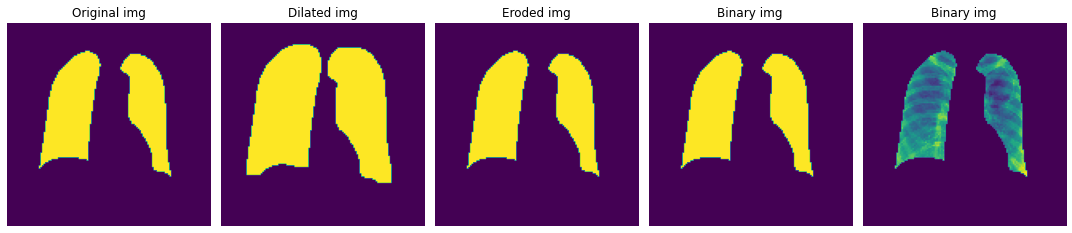

In [10]:
#DENEME
plt.figure(figsize=(15,10))
plt.axis('Off')

plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title("Original img")
plt.axis('Off')

plt.subplot(1, 5, 2)
plt.imshow(dilated)
plt.title("Dilated img")
plt.axis('Off')

plt.subplot(1, 5, 3)
plt.imshow(eroded)
plt.title("Eroded img")
plt.axis('Off')

plt.subplot(1, 5, 4)
plt.imshow(binary_img)
plt.title("Binary img")
plt.axis('Off')

plt.subplot(1, 5, 5)
plt.imshow(b)
plt.title("Binary img")
plt.axis('Off')

plt.tight_layout()
plt.show()

In [11]:
img_path = 'C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Pneumothorax\\'
save_path ='C:\\Users\\ugur_\\Python Projects\\LungClassifier\\NIH Data\\Pneumothorax Mask\\'

SaveGeneratedMask(Image_collection_path=img_path, save_path= save_path, modelName='model.h5')


In [ ]:
# img_path2 = 'C:\\Users\\ugur_\\Python Projects\\LungClassifier\\mask_00001247_001.png'
# img = cv2.imread(img_path2, 0)
# 
# ret, binary_img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) #binary img
# 
# kernel = np.ones((4, 4), np.uint8)
# 
# cleaned = morphology.remove_small_objects(binary_img, min_size=64, connectivity=2)
# dilated = cv2.dilate(img.copy(), None, iterations=4) #gray img
# eroded = cv2.erode(dilated.copy(), None, iterations=4) #gray img
# 
# cv2.imshow("cleaned", eroded)
# cv2.waitKey(0)

-1

In [22]:
from skimage import measure

deneme_path = 'C:\\Users\\ugur_\\Python Projects\\LungClassifier\\mask_00001247_001.png'
deneme_img = cv2.imread(deneme_path,0)

all_labels = measure.label(deneme_img)
label_count = np.amax(all_labels)

for i in (label_count):
    if i >= 2:
        #pixel_count = np.sum(np.array(all_labels) == i)
        pass



3


NameError: name 'cleaned' is not defined

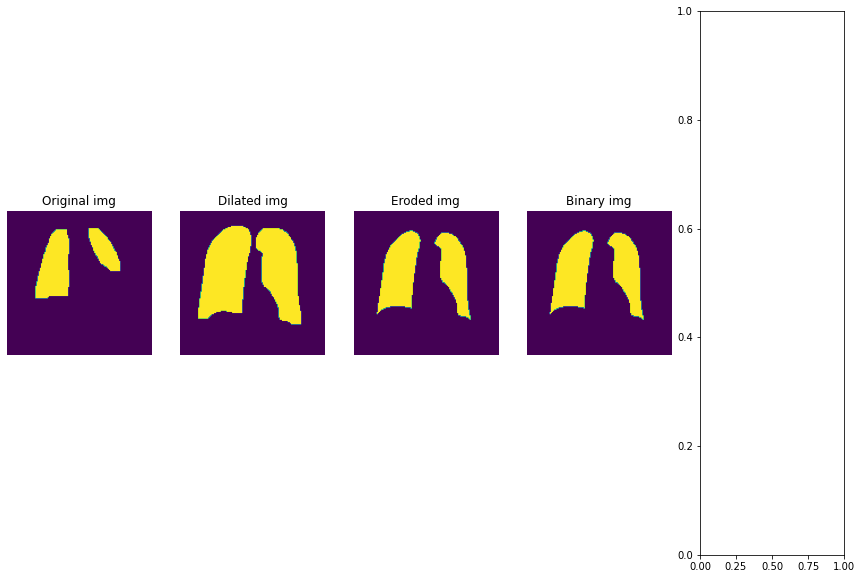

In [ ]:
#DENEME
plt.figure(figsize=(15,10))
plt.axis('Off')

plt.subplot(1, 5, 1)
plt.imshow(close)
plt.title("Original img")
plt.axis('Off')

plt.subplot(1, 5, 2)
plt.imshow(dilated)
plt.title("Dilated img")
plt.axis('Off')

plt.subplot(1, 5, 3)
plt.imshow(eroded)
plt.title("Eroded img")
plt.axis('Off')

plt.subplot(1, 5, 4)
plt.imshow(binary_img)
plt.title("Binary img")
plt.axis('Off')

#plt.subplot(1, 5, 5)
#plt.imshow(cleaned)
#plt.title("cleaned img")
#plt.axis('Off')

plt.tight_layout()
plt.show()